## Fitting Ne lines in a loop
- This notebook shows how to fit all lines in a folder defined by path
- You tweak the fit for a single line, and then use this to fit all lines. You can then refit lines with high residuals/offsets differing from the rest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf

## Choose path and extract files here

In [2]:
path=r'G:\My Drive\Berkeley_NEW\DiadFit_outer\Testing\Ne_Lines'
filetype='headless_txt'
# Put the common string you can in all your Ne lines here
ID_str='NE'
file_fmt='txt'
exclude_str='png'
# If you added a prefix in Witec, e.g. 01, removes when svaing the Ne line name 
prefix=False
Ne_files=pf.get_Ne_files(path=path, ID_str=ID_str, exclude_str=exclude_str, sort=True)

## Fit 1 spectra, and check you are happy with the parameters
- First plot i, and check peak postion. 

Found peaks at wavenumber=
[1053.952476 1062.997554 1069.207287 1075.973412 1085.544249 1105.19545
 1118.069988 1123.099423 1135.930916 1143.726271 1147.06364  1179.216877
 1200.727403 1205.12894  1215.018881 1220.505213 1243.484908 1258.748373
 1290.222677 1298.871422 1301.571161 1305.348403 1307.505574 1310.739623
 1318.815787 1341.89664  1347.784208 1372.330828 1376.587615 1387.744526
 1393.578719 1399.40611  1424.755285 1429.49389  1436.330549 1447.878781
 1465.672988 1488.085395 1497.95589  1516.603126 1536.208746 1539.297102
 1549.577333 1552.143958 1567.003346 1587.932904]
selected Peak 1 Pos
1118.069988
selected Peak 2 Pos
1447.878781


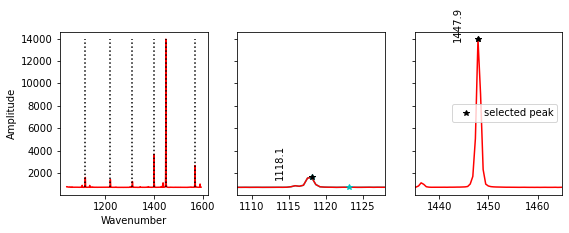

In [9]:
filename=Ne_files[1]  # Or you could put a string here, like 'NE1.txt' 
# You might need to adjust if your spectra is way off
peak1_cent=1118
peak2_cent=1450


Ne, df_sort_Ne_trim, nearest_1117, nearest_1447=pf.plot_Ne_lines(path=path, filename=filename, filetype=filetype, 
n_peaks=6, peak1_cent=peak1_cent, peak2_cent=peak2_cent,
height=10, threshold=0.6, distance=1, prominence=10, width=1, exclude_range_1=None,
exclude_range_2=None)

## Now tweak the fit for this 1 example
- Most important things, the number of peaks you want for 1117, and the offset for this peak (LH_offset_min)
- By default, the function applies the fit to all the points inside the outermost background positions. This can be trimmed using x_span_pk1_override, and x_span_pk2_override, 

first iteration, peak Center=1117.8109
first iteration, peak Amplitude=1412.8806
Trying to place second peak between 1112.81and1115.81
Error bars not determined by function


,File_Name,1447_peak_cent,error_1447,1117_peak_cent,error_1117,deltaNe,Ne_Corr,Ne_Corr_min,Ne_Corr_max,residual_1447,residual_1117
0,04 NE 2.txt,1448.001126,0.00721,1117.811821,NaN,330.189306,1.000873,NaN,NaN,136.257934,11.98437


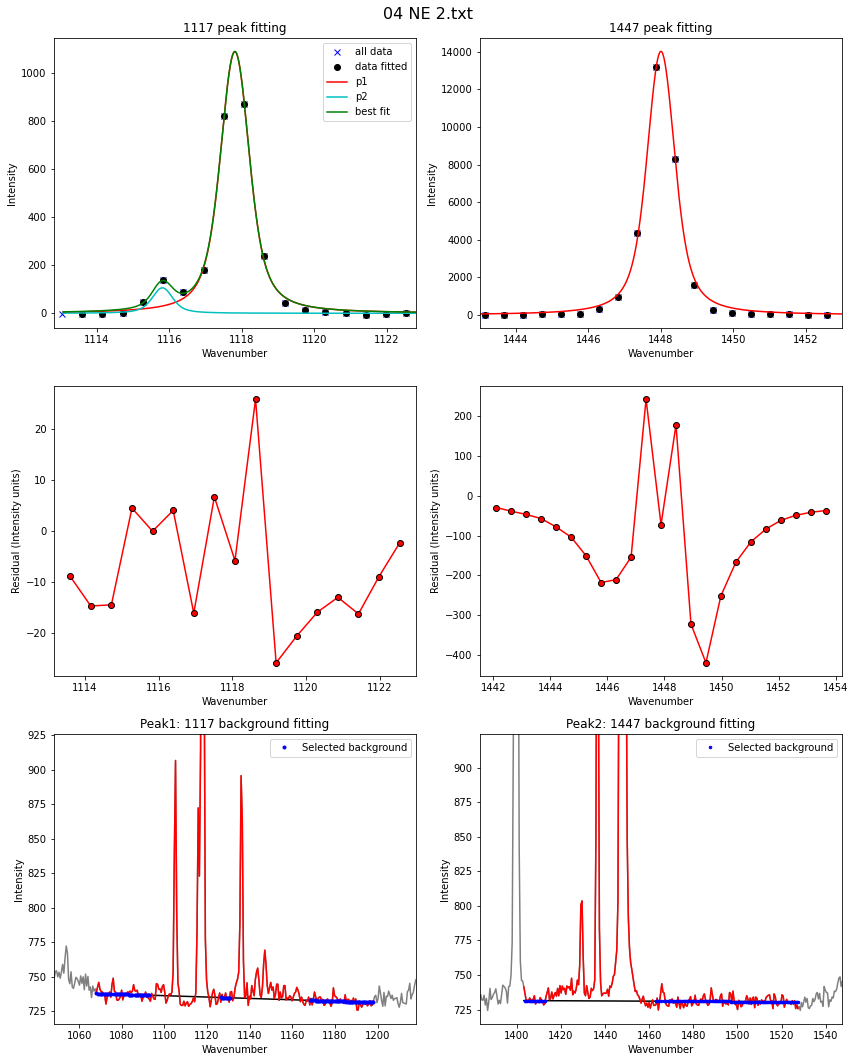

In [10]:
#If you have weak Ne lines and no secondary peak, set to 1
peaks_1=2
# Determines how far from the peak center the 2nd peak is. 
LH_offset_mini=[2, 5]
# If fit really bad, try tweaking the amplitude here
amplitude=100
#x_range - Determins how much outside your selected background position the baseline plot shows
x_range_baseline=20
# Y range- Determins how much y axis you get above the baseline on the plot
y_range_baseline=200

# Can either set this as none, in which case it fits between the background positions,
#or decide exactly how many wavenumbers either side of the peak position above you want the voigt routine to fit
# E.g. here, fitting 10 either side of the peak for Peak 1
x_span_pk1_override=[-5, 5]
# And -5 to the left, 7 to the right of Peak2
x_span_pk2_override=[-6, 6]

# Sets x lim for peak fit top plot, if None, uses range of x of fitting data, can override
x_range_peak=5



# To see other parameters you can tweak, do help(pf.fit_Ne_lines) if this isn't working fo your spectra. 
df_test, Ne_1117_reg_x_plot, Ne_1117_reg_y_plot=pf.fit_Ne_lines(
Ne=Ne, filename=filename, path=path, prefix=prefix,
LH_offset_mini=LH_offset_mini, peaks_1=peaks_1,
Ne_center_1=nearest_1117, Ne_center_2=nearest_1447,
lower_bck_pk1=[-50, -25], upper_bck1_pk1=[8, 13], upper_bck2_pk1=[50, 80],
lower_bck_pk2=[-45, -35], upper_bck1_pk2=[15, 50], upper_bck2_pk2=[50, 80],
amplitude=amplitude, x_range_baseline=x_range_baseline, y_range_baseline=y_range_baseline, 
x_span_pk1_override=x_span_pk1_override,
x_span_pk2_override=x_span_pk2_override, x_range_peak=x_range_peak)
df_test


## Now you can loop over all files using these parameters
- Most important thing you can change is plot_figure=False, much quicker, but wont save or show figures, plot_figure=True will)
- If you need, you can add other parameters in the loop here. 

In [11]:
plot_figure=False # Means doesnt make figures, lot faster. 
save_excel=True # Saves to excel
save_clipboard=True # Copies to clipboard

df = pd.DataFrame([])
for i in range(0, len(Ne_files)):
    
    filename=Ne_files[i]
    Ne=pf.get_data(path=path, filename=filename, filetype=filetype)
    print('working on ' + str(Ne_files[i]))

    data=pf.fit_Ne_lines(Ne=Ne, filename=filename, path=path, prefix=prefix,
                         
                         
LH_offset_mini=LH_offset_mini, peaks_1=peaks_1, Ne_center_1=nearest_1117,
lower_bck_pk1=[-50, -25], upper_bck1_pk1=[8, 13], upper_bck2_pk1=[50, 80],
lower_bck_pk2=[-40, -30], upper_bck1_pk2=[15, 50], upper_bck2_pk2=[50, 80],                         
Ne_center_2=nearest_1447, amplitude=amplitude, 
x_range_baseline=x_range_baseline, y_range_baseline=y_range_baseline, 
x_span_pk1_override=x_span_pk1_override,
x_span_pk2_override=x_span_pk2_override, x_range_peak=x_range_peak,                         
plot_figure=plot_figure, loop=True)
    
    



    df = df.append(data)
    
df.to_excel('Ne_Lines_fit_loop.xlsx')
df.to_clipboard(excel=True)



working on 02 NE 1.txt
first iteration, peak Center=1117.794
first iteration, peak Amplitude=251591.7494
Trying to place second peak between 1112.79and1115.79
Error bars not determined by function
working on 04 NE 2.txt
first iteration, peak Center=1117.8109
first iteration, peak Amplitude=1412.8806
Trying to place second peak between 1112.81and1115.81
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_3724\801095757.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_3724\801095757.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 07 NE 3.txt
first iteration, peak Center=1117.8326
first iteration, peak Amplitude=1451.0615
Trying to place second peak between 1112.83and1115.83
Error bars not determined by function
working on 12 NE 4.txt


C:\Users\penny\AppData\Local\Temp\ipykernel_3724\801095757.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


first iteration, peak Center=1117.8066
first iteration, peak Amplitude=1451.7068
Trying to place second peak between 1112.81and1115.81
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_3724\801095757.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_3724\801095757.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 14 NE 5.txt
first iteration, peak Center=1117.8021
first iteration, peak Amplitude=1480.6091
Trying to place second peak between 1112.8and1115.8
Error bars not determined by function
working on 18 NE 6.txt
first iteration, peak Center=1117.8407
first iteration, peak Amplitude=1484.9446
Trying to place second peak between 1112.84and1115.84
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_3724\801095757.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_3724\801095757.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 20 NE 7.txt
first iteration, peak Center=1117.8247
first iteration, peak Amplitude=1466.8831
Trying to place second peak between 1112.82and1115.82
Error bars not determined by function
working on 25 NE 8.txt
first iteration, peak Center=1117.8458
first iteration, peak Amplitude=1428.354
Trying to place second peak between 1112.85and1115.85
Error bars not determined by function
working on 27 NE 9.txt
first iteration, peak Center=1117.8489
first iteration, peak Amplitude=1449.7471
Trying to place second peak between 1112.85and1115.85
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_3724\801095757.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_3724\801095757.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 29 NE 10.txt
first iteration, peak Center=1117.8345
first iteration, peak Amplitude=1420.3635
Trying to place second peak between 1112.83and1115.83
Error bars not determined by function
working on 31 NE 11.txt
first iteration, peak Center=1117.8315
first iteration, peak Amplitude=1417.9885
Trying to place second peak between 1112.83and1115.83

C:\Users\penny\AppData\Local\Temp\ipykernel_3724\801095757.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
C:\Users\penny\AppData\Local\Temp\ipykernel_3724\801095757.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)



Error bars not determined by function
working on 33 NE 12.txt
first iteration, peak Center=1117.8315
first iteration, peak Amplitude=1454.647
Trying to place second peak between 1112.83and1115.83
Error bars not determined by function


C:\Users\penny\AppData\Local\Temp\ipykernel_3724\801095757.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


## Look at residuals to work out if you need to fit some by hand

outliers


,File_Name,1447_peak_cent,error_1447,1117_peak_cent,error_1117,deltaNe,Ne_Corr,Ne_Corr_min,Ne_Corr_max,residual_1447,residual_1117
0,02 NE 1.txt,1448.004569,0.00722,1117.594044,NaN,330.410525,1.000203,NaN,NaN,141.256916,1080.953924


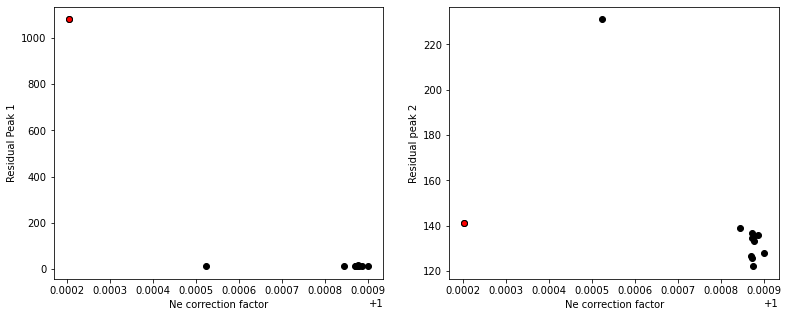

In [13]:
# Identify ones more than x sigma outside the mean of the splitting

Std_split=np.std(df['Ne_Corr'])
Mean_split=np.mean(df['Ne_Corr'])
# How many sigma outside mean splitting you want to consider
sigma=2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))
ax1.plot(df['Ne_Corr'], df['residual_1117'], 'ok', mfc='black')
ax2.plot(df['Ne_Corr'], df['residual_1447'], 'ok', mfc='black')
ax1.set_xlabel('Ne correction factor')
ax2.set_xlabel('Ne correction factor')
ax1.set_ylabel('Residual Peak 1')
ax2.set_ylabel('Residual peak 2')



outlier=df.loc[abs(Mean_split-df['Ne_Corr'])>Std_split*2]
ax1.plot(outlier['Ne_Corr'], outlier['residual_1117'], 'ok', mfc='red')
ax2.plot(outlier['Ne_Corr'], outlier['residual_1447'], 'ok', mfc='red')
print('outliers')
outlier


In [15]:
outlier['File_Name']

0    02 NE 1.txt
Name: File_Name, dtype: object

## Manually fit ones you aren't happy with, and hand paste in

first iteration, peak Center=1117.8315
first iteration, peak Amplitude=1454.647
Trying to place second peak between 1112.83and1115.83
Error bars not determined by function


,File_Name,1447_peak_cent,error_1447,1117_peak_cent,error_1117,deltaNe,Ne_Corr,Ne_Corr_min,Ne_Corr_max,residual_1447,residual_1117
0,02 NE 1.txt,1448.017414,0.0079,1117.832457,NaN,330.184957,1.000886,NaN,NaN,156.182701,13.137729


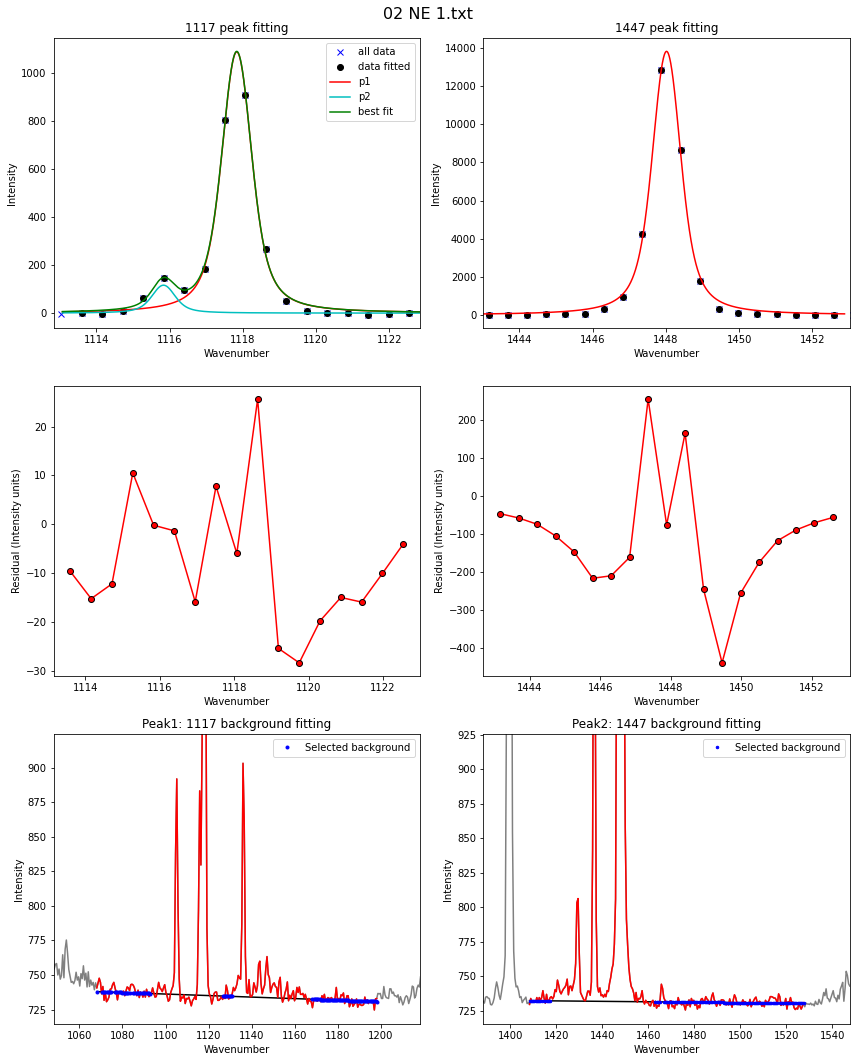

In [17]:
filename='02 NE 1.txt'
#If you have weak Ne lines and no secondary peak, set to 1
peaks_1=2
# Determines how far from the peak center the 2nd peak is. 
LH_offset_mini=[2, 5]
# If fit really bad, try tweaking the amplitude here
amplitude=100
#x_range - Determins how much outside your selected background position the baseline plot shows
x_range_baseline=20
# Y range- Determins how much y axis you get above the baseline on the plot
y_range_baseline=200

# Can either set this as none, in which case it fits between the background positions,
#or decide exactly how many wavenumbers either side of the peak position above you want the voigt routine to fit
# E.g. here, fitting 10 either side of the peak for Peak 1
x_span_pk1_override=[-5, 5]
# And -5 to the left, 7 to the right of Peak2
x_span_pk2_override=[-5, 5]

# Sets x lim for peak fit top plot, if None, uses range of x of fitting data, can override
x_range_peak=5


# To see other parameters you can tweak, do help(pf.fit_Ne_lines) if this isn't working fo your spectra. 
df_test, Ne_1117_reg_x_plot, Ne_1117_reg_y_plot=pf.fit_Ne_lines(
Ne=Ne, filename=filename, path=path, prefix=prefix,
LH_offset_mini=LH_offset_mini, peaks_1=peaks_1,
Ne_center_1=nearest_1117, Ne_center_2=nearest_1447,
lower_bck_pk1=[-50, -25], upper_bck1_pk1=[8, 13], upper_bck2_pk1=[50, 80],
lower_bck_pk2=[-40, -30], upper_bck1_pk2=[15, 50], upper_bck2_pk2=[50, 80],
amplitude=amplitude, x_range_baseline=x_range_baseline, y_range_baseline=y_range_baseline, 
x_span_pk1_override=x_span_pk1_override,
x_span_pk2_override=x_span_pk2_override, x_range_peak=x_range_peak)

df_test
